In [1]:
import pandas as pd

# Step 1: Load the data
stock_mapping_df = pd.read_csv('stock_industry_mapping.csv')
news_df = pd.read_csv('news.csv')

# Step 2: Explore the data
# Check the number of rows and columns in each dataframe
print("Stock Mapping Data - Rows:", stock_mapping_df.shape[0], "Columns:", stock_mapping_df.shape[1])
print("News Data - Rows:", news_df.shape[0], "Columns:", news_df.shape[1])

# Display the first few rows of each dataframe
print("\nStock Mapping Data:")
print(stock_mapping_df.head())

print("\nNews Data:")
print(news_df.head())

# Check for missing values or inconsistencies in the data
print("\nMissing values in Stock Mapping Data:")
print(stock_mapping_df.isnull().sum())

print("\nMissing values in News Data:")
print(news_df.isnull().sum())

# Perform basic data cleaning if necessary (e.g., handling missing values)

# Drop rows with missing values in stock_mapping_df
stock_mapping_df.dropna(inplace=True)

# Convert published column in news_df to datetime format
news_df['published'] = pd.to_datetime(news_df['published'])

# Drop duplicates in news_df based on the id column
news_df.drop_duplicates(subset='id', inplace=True)


Stock Mapping Data - Rows: 4152 Columns: 4
News Data - Rows: 134 Columns: 11

Stock Mapping Data:
                                     id      ticker   
0  11852b68-25b6-11ec-883c-8c859079d2ba         ABB  \
1  11852c82-25b6-11ec-bc9c-8c859079d2ba   AEGISCHEM   
2  11852ce6-25b6-11ec-8065-8c859079d2ba  AMARAJABAT   
3  11852d2c-25b6-11ec-9c33-8c859079d2ba  AMBASARABH   
4  11852d74-25b6-11ec-bff1-8c859079d2ba        HDFC   

                                          stock                 industry  
0                                ABB India Ltd.       Electric Equipment  
1                          Aegis Logistics Ltd.                Logistics  
2                     Amara Raja Batteries Ltd.                Batteries  
3             Ambalal Sarabhai Enterprises Ltd.  Pharmaceuticals & Drugs  
4  Housing Development Finance Corporation Ltd.        Finance - Housing  

News Data:
                                     id   
0  2d903f26-0885-11ee-ad77-acde48001122  \
1  2d903ff8-0885-11ee-a

In [2]:
# Step 3: Perform analytics on the data

# Analyze the stock industry mapping
# Count the number of unique stocks and industries
num_unique_stocks = stock_mapping_df['ticker'].nunique()
num_unique_industries = stock_mapping_df['industry'].nunique()
print("\nNumber of unique stocks:", num_unique_stocks)
print("Number of unique industries:", num_unique_industries)

# Identify the most common industries
top_industries = stock_mapping_df['industry'].value_counts().head()
print("\nTop Industries:")
print(top_industries)

# Explore the distribution of stocks across industries
stocks_per_industry = stock_mapping_df['industry'].value_counts()
print("\nStocks per Industry:")
print(stocks_per_industry)

# Analyze the news data
# Determine the number of news articles related to stocks and those not related
related_news_count = news_df['mapped_stock_id'].notnull().sum()
not_related_news_count = news_df['mapped_stock_id'].isnull().sum()
print("\nNumber of news articles related to stocks:", related_news_count)
print("Number of news articles not related to stocks:", not_related_news_count)

# Identify the most frequent news sources
top_news_sources = news_df['source'].value_counts().head()
print("\nTop News Sources:")
print(top_news_sources)

# Identify the most frequent organizations mentioned in the news
top_organizations = news_df['org'].value_counts().head()
print("\nTop Organizations:")
print(top_organizations)

# Examine the distribution of news articles over time (published date)
news_df['year'] = news_df['published'].dt.year
news_articles_per_year = news_df['year'].value_counts().sort_index()
print("\nNews Articles per Year:")
print(news_articles_per_year)

# Identify the most common stocks and industries mentioned in the news
top_mentioned_stocks = news_df['stock'].value_counts().head()
top_mentioned_industries = news_df['industry'].value_counts().head()
print("\nTop Mentioned Stocks:")
print(top_mentioned_stocks)
print("\nTop Mentioned Industries:")
print(top_mentioned_industries)



Number of unique stocks: 4152
Number of unique industries: 121

Top Industries:
industry
Trading                 307
Finance - NBFC          268
Finance - Investment    221
Textile                 194
IT - Software           189
Name: count, dtype: int64

Stocks per Industry:
industry
Trading                                 307
Finance - NBFC                          268
Finance - Investment                    221
Textile                                 194
IT - Software                           189
                                       ... 
Courier  Services                         2
Detergents & Soaps                        2
Carbon Black                              2
Watches & Accessories                     2
Automobiles - Dealers & Distributors      2
Name: count, Length: 121, dtype: int64

Number of news articles related to stocks: 35
Number of news articles not related to stocks: 42

Top News Sources:
source
cnbc             39
live_mint        25
money_control    13
Name: c

In [4]:
merged_df = pd.merge(stock_mapping_df, news_df, left_on='id', right_on='mapped_stock_id', how='inner')
print(merged_df)

                                    id_x    ticker_x   
0   11853134-25b6-11ec-8e7f-8c859079d2ba  CENTURYTEX  \
1   1185329a-25b6-11ec-8df0-8c859079d2ba        BEPL   
2   1185391e-25b6-11ec-83e9-8c859079d2ba        SBIN   
3   11853c5e-25b6-11ec-8c50-8c859079d2ba       ESTER   
4   11854534-25b6-11ec-a50c-8c859079d2ba        INFY   
5   11854534-25b6-11ec-a50c-8c859079d2ba        INFY   
6   11854afa-25b6-11ec-827f-8c859079d2ba   KOTAKBANK   
7   11854afa-25b6-11ec-827f-8c859079d2ba   KOTAKBANK   
8   11854fdc-25b6-11ec-b892-8c859079d2ba    SPICEJET   
9   11855400-25b6-11ec-8593-8c859079d2ba    RELIANCE   
10  118563d2-25b6-11ec-a7ec-8c859079d2ba  BHARATFORG   
11  118565e4-25b6-11ec-9e12-8c859079d2ba  TATAMOTORS   
12  11856c2e-25b6-11ec-a9eb-8c859079d2ba  APOLLOTYRE   
13  11856c2e-25b6-11ec-a9eb-8c859079d2ba  APOLLOTYRE   
14  1185a6e4-25b6-11ec-9cc1-8c859079d2ba      506543   
15  1186400c-25b6-11ec-b28e-8c859079d2ba      TRIGYN   
16  1186addc-25b6-11ec-b01e-8c859079d2ba   PREME

In [5]:
# setiment analysis and keywords in news
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set up NLTK
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

# Keyword Extraction
stop_words = set(stopwords.words('english'))

# Sentiment Analysis on news titles
news_df['title_sentiment'] = news_df['title'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Keyword Extraction from news summaries
news_df['summary_keywords'] = news_df['summary'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.lower() not in stop_words])

# Example output: Average sentiment score and extracted keywords for each news article
print("News Sentiment and Keywords:")
for index, row in news_df.iterrows():
    print("News ID:", row['id'])
    print("Sentiment Score:", row['title_sentiment'])
    print("Keywords:", row['summary_keywords'])
    print("\n")


[nltk_data] Downloading package vader_lexicon to C:\Users\Omkar
[nltk_data]     Borker\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to C:\Users\Omkar
[nltk_data]     Borker\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Omkar
[nltk_data]     Borker\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


News Sentiment and Keywords:
News ID: 2d903f26-0885-11ee-ad77-acde48001122
Sentiment Score: 0.0
Keywords: ['inspection', 'conducted', 'german', 'health', 'authority', 'company', '’', 'manufacturing', 'unit', 'may', '22-25', ',', '2023', '.']


News ID: 2d903ff8-0885-11ee-ad77-acde48001122
Sentiment Score: -0.296
Keywords: ['target', 'price', 'hdfc', 'life', 'insurance', 'cut', 'rs', '556', 'rs', '655', 'earlier', ',', 'icici', 'prudential', 'life', 'target', 'price', 'slashed', 'rs', '486', 'rs', '580', 'sbi', 'life', 'insurance', 'target', 'price', 'rs', '1,306', 'rs', '1,580', 'share', '.']


News ID: 2d90400c-0885-11ee-ad77-acde48001122
Sentiment Score: 0.0
Keywords: ['include', 'total', 'around', '1,500', 'male', 'female', 'nafld', 'patients', 'comorbidities', 'like', 'obesity', ',', 'dyslipidemia', ',', 'type', '2', 'diabetes', 'mellitus', 'metabolic', 'syndrome', '.']


News ID: 2d9041ba-0885-11ee-ad77-acde48001122
Sentiment Score: 0.0
Keywords: ['rise', 'japanese', 'equities', '

Classification Report:
                               precision    recall  f1-score   support

                    Chemicals       0.00      0.00      0.00         1
               Finance - NBFC       1.00      0.50      0.67         2
                IT - Software       0.00      0.00      0.00         0
Power Generation-Distribution       0.00      0.00      0.00         1
                   Refineries       0.00      0.00      0.00         2
                    Retailing       0.00      0.00      0.00         1

                     accuracy                           0.14         7
                    macro avg       0.17      0.08      0.11         7
                 weighted avg       0.29      0.14      0.19         7



c:\Users\Omkar Borker\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Omkar Borker\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Omkar Borker\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

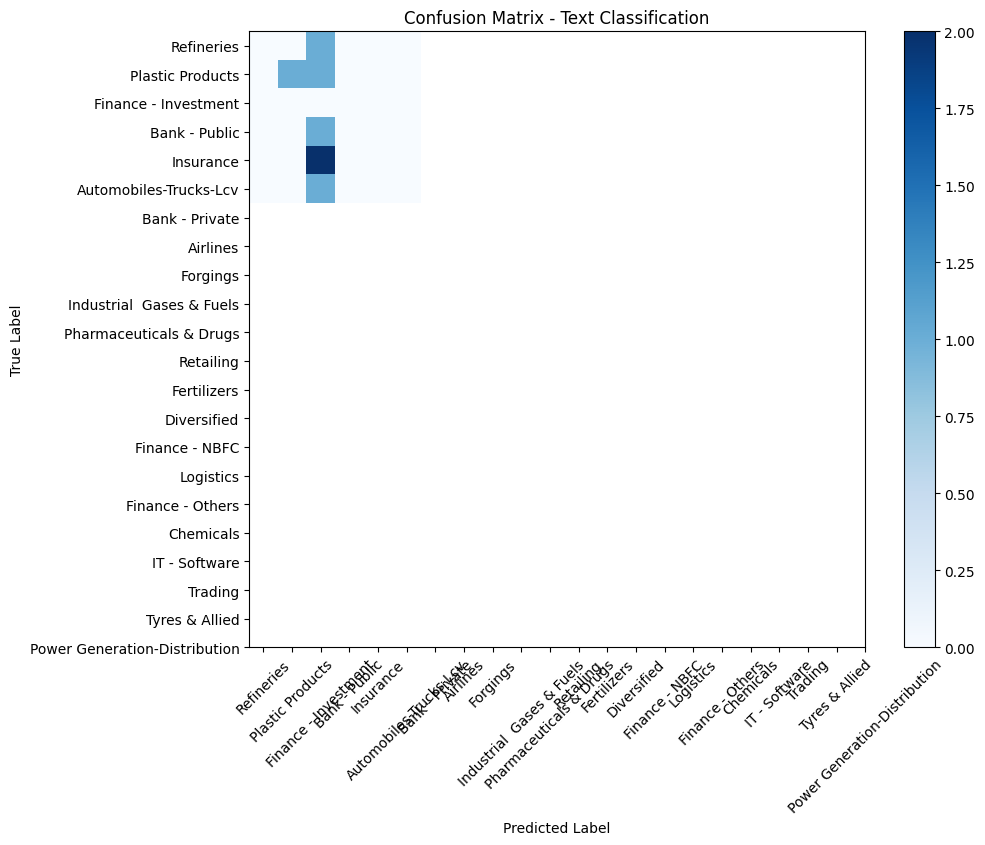

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Filter out rows with missing values in mapped_stock_id
news_df_filtered = news_df.dropna(subset=['mapped_stock_id'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(news_df_filtered['summary'], news_df_filtered['industry'], test_size=0.2, random_state=42)

# Create a pipeline for text classification
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the industry for the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the classification performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Text Classification')
plt.colorbar()
tick_marks = range(len(set(news_df_filtered['industry'])))
plt.xticks(tick_marks, list(set(news_df_filtered['industry'])), rotation=45)
plt.yticks(tick_marks, list(set(news_df_filtered['industry'])))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [5]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to C:\Users\Omkar
[nltk_data]     Borker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Omkar Borker\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Omkar
[nltk_data]     Borker\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to C:\Users\Omkar
[nltk_data]     Borker\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [17]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# Load the news data
news_df = pd.read_csv('news.csv')

# Load stopwords for English from NLTK
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# Define keywords indicating changes in stock prices
increase_keywords = ['increased', 'raised']
decrease_keywords = ['decreased', 'lowered', 'reduced', 'slashed', 'cut']

# Function to classify stock price change based on keywords
def classify_stock_price_change(summary):
    tokens = word_tokenize(summary.lower())  # Tokenize and convert to lowercase
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords]  # Remove stopwords and non-alphabetic tokens
    
    # Count the occurrences of increase and decrease keywords
    increase_count = sum([tokens.count(keyword) for keyword in increase_keywords])
    decrease_count = sum([tokens.count(keyword) for keyword in decrease_keywords])
    
    if increase_count > decrease_count:
        return 'Increased'
    elif decrease_count > increase_count:
        return 'Decreased'
    else:
        return 'No Change'

# Apply the classification function to the summary column
news_df['stock_price_change'] = news_df['summary'].apply(classify_stock_price_change)

# Display the resulting dataframe with the stock price change classification
print(news_df[['id', 'org', 'mapped_stock_id', 'ticker', 'stock', 'industry', 'stock_price_change']])


                                       id                 org   
0    2d903f26-0885-11ee-ad77-acde48001122     Indoco Remedies  \
1    2d903ff8-0885-11ee-ad77-acde48001122           HDFC Life   
2    2d903ff8-0885-11ee-ad77-acde48001122    ICICI Prudential   
3    2d903ff8-0885-11ee-ad77-acde48001122           Macquarie   
4    2d903ff8-0885-11ee-ad77-acde48001122            SBI Life   
..                                    ...                 ...   
129  2d903e18-0885-11ee-ad77-acde48001122  Schneider Electric   
130  2d903e4a-0885-11ee-ad77-acde48001122            SpiceJet   
131  2d903e2c-0885-11ee-ad77-acde48001122             El Nino   
132  2d903de6-0885-11ee-ad77-acde48001122      Sula Vineyards   
133  2d903dfa-0885-11ee-ad77-acde48001122   Tata Teleservices   

                          mapped_stock_id    ticker   
0    118788d8-25b6-11ec-afd7-8c859079d2ba    INDOCO  \
1    1187f6f6-25b6-11ec-966b-8c859079d2ba  HDFCLIFE   
2                                     NaN       NaN   

[nltk_data] Downloading package stopwords to C:\Users\Omkar
[nltk_data]     Borker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


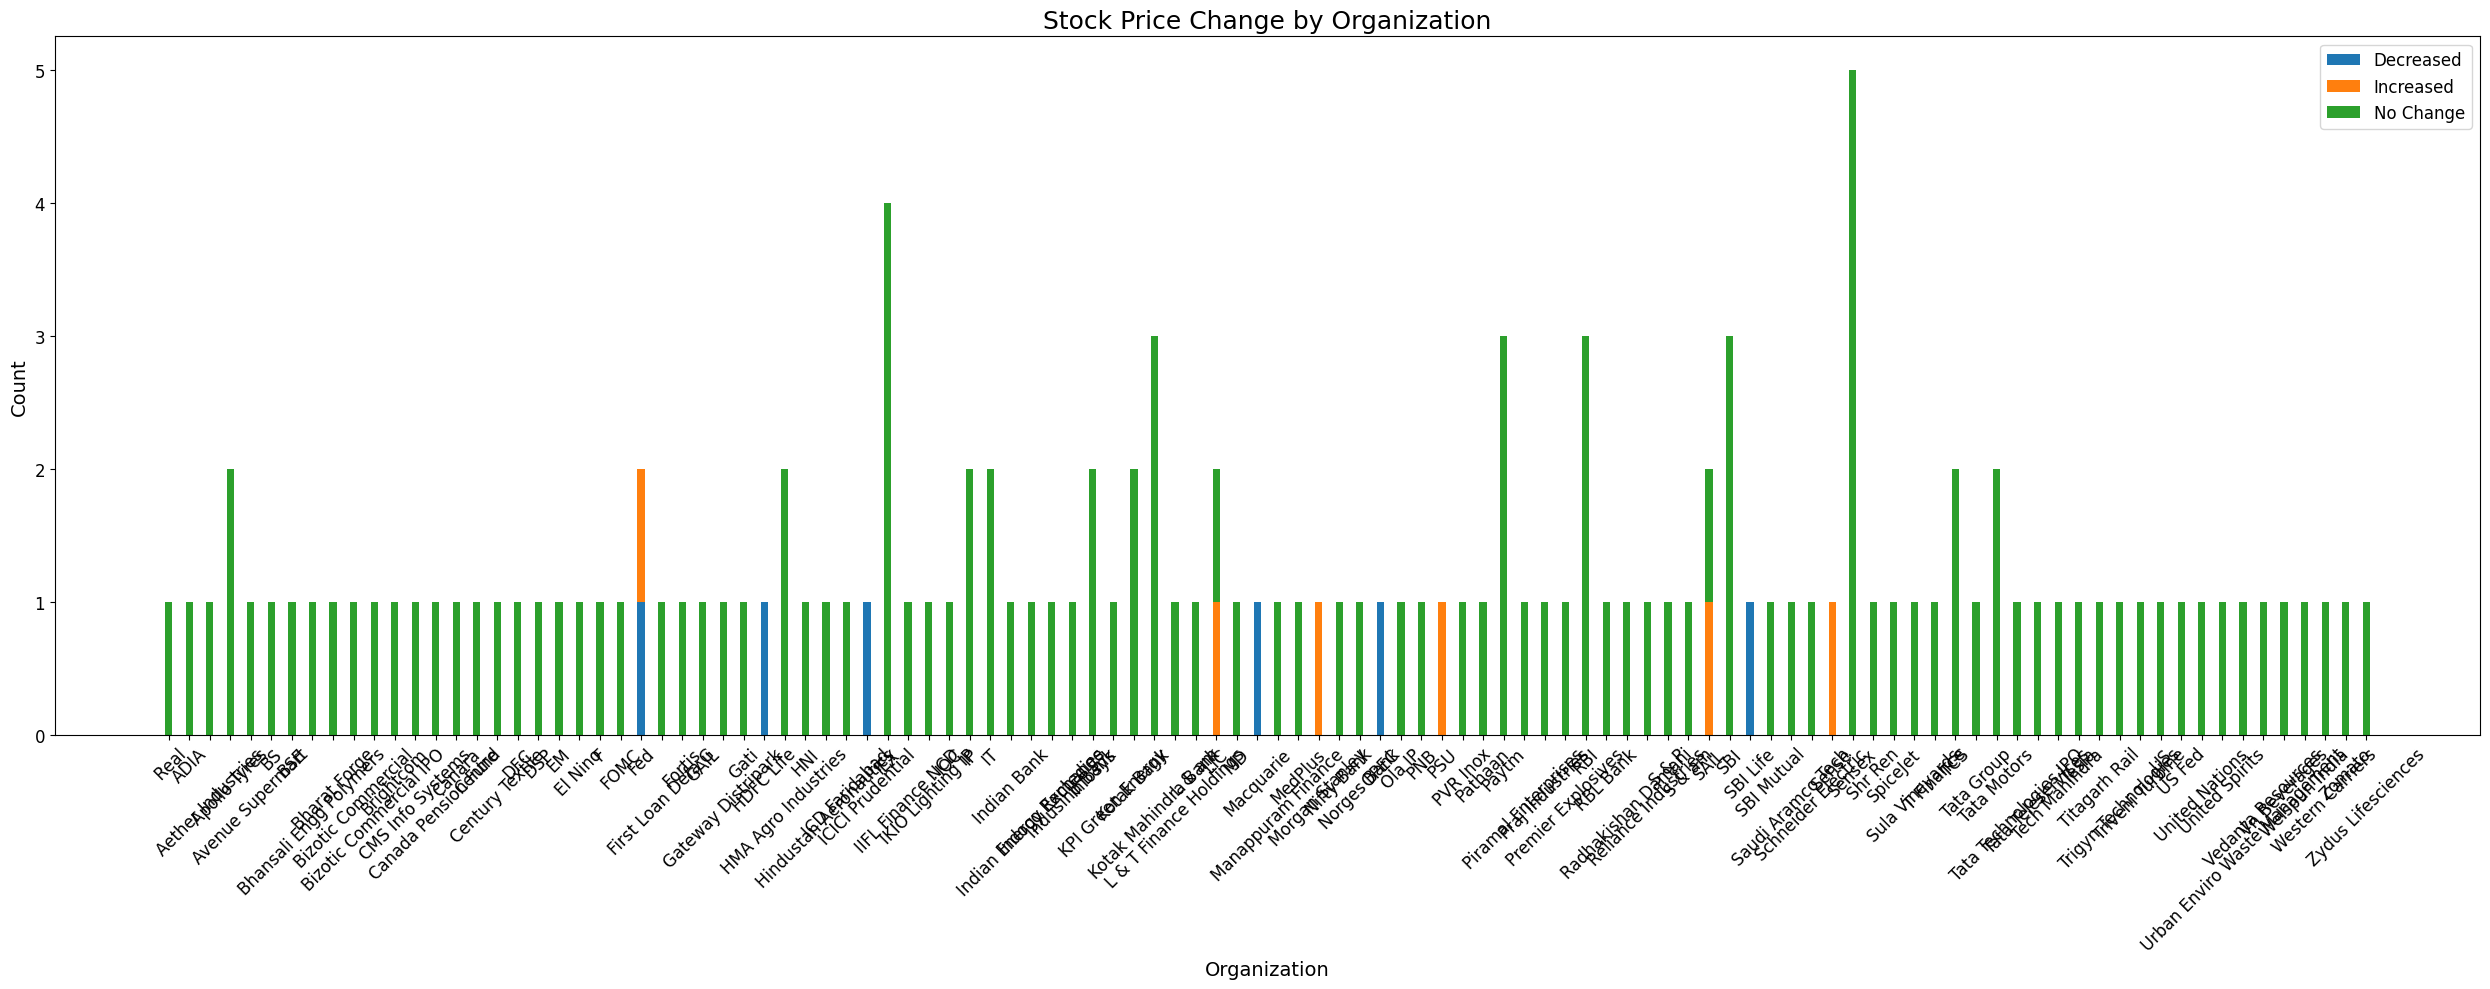

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of stock price changes for each organization
change_counts = news_df.groupby(['org', 'stock_price_change']).size().unstack().fillna(0)

# Extract organization names and stock price change categories
organizations = change_counts.index
categories = change_counts.columns

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(len(organizations))

# Plot the bars for each stock price change category
plt.figure(figsize=(25, 10))
plt.bar(x, change_counts['Decreased'], width=bar_width, label='Decreased')
plt.bar(x, change_counts['Increased'], width=bar_width, bottom=change_counts['Decreased'], label='Increased')
plt.bar(x, change_counts['No Change'], width=bar_width, bottom=change_counts['Decreased'] + change_counts['Increased'], label='No Change')

# Set x-axis labels, title, and legend
plt.xlabel('Organization', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Stock Price Change by Organization', fontsize=18)
plt.xticks(x, organizations, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Adjust spacing
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

plt.tight_layout()
plt.show()

C:\Users\Omkar Borker\AppData\Local\Temp\ipykernel_3028\2820233252.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


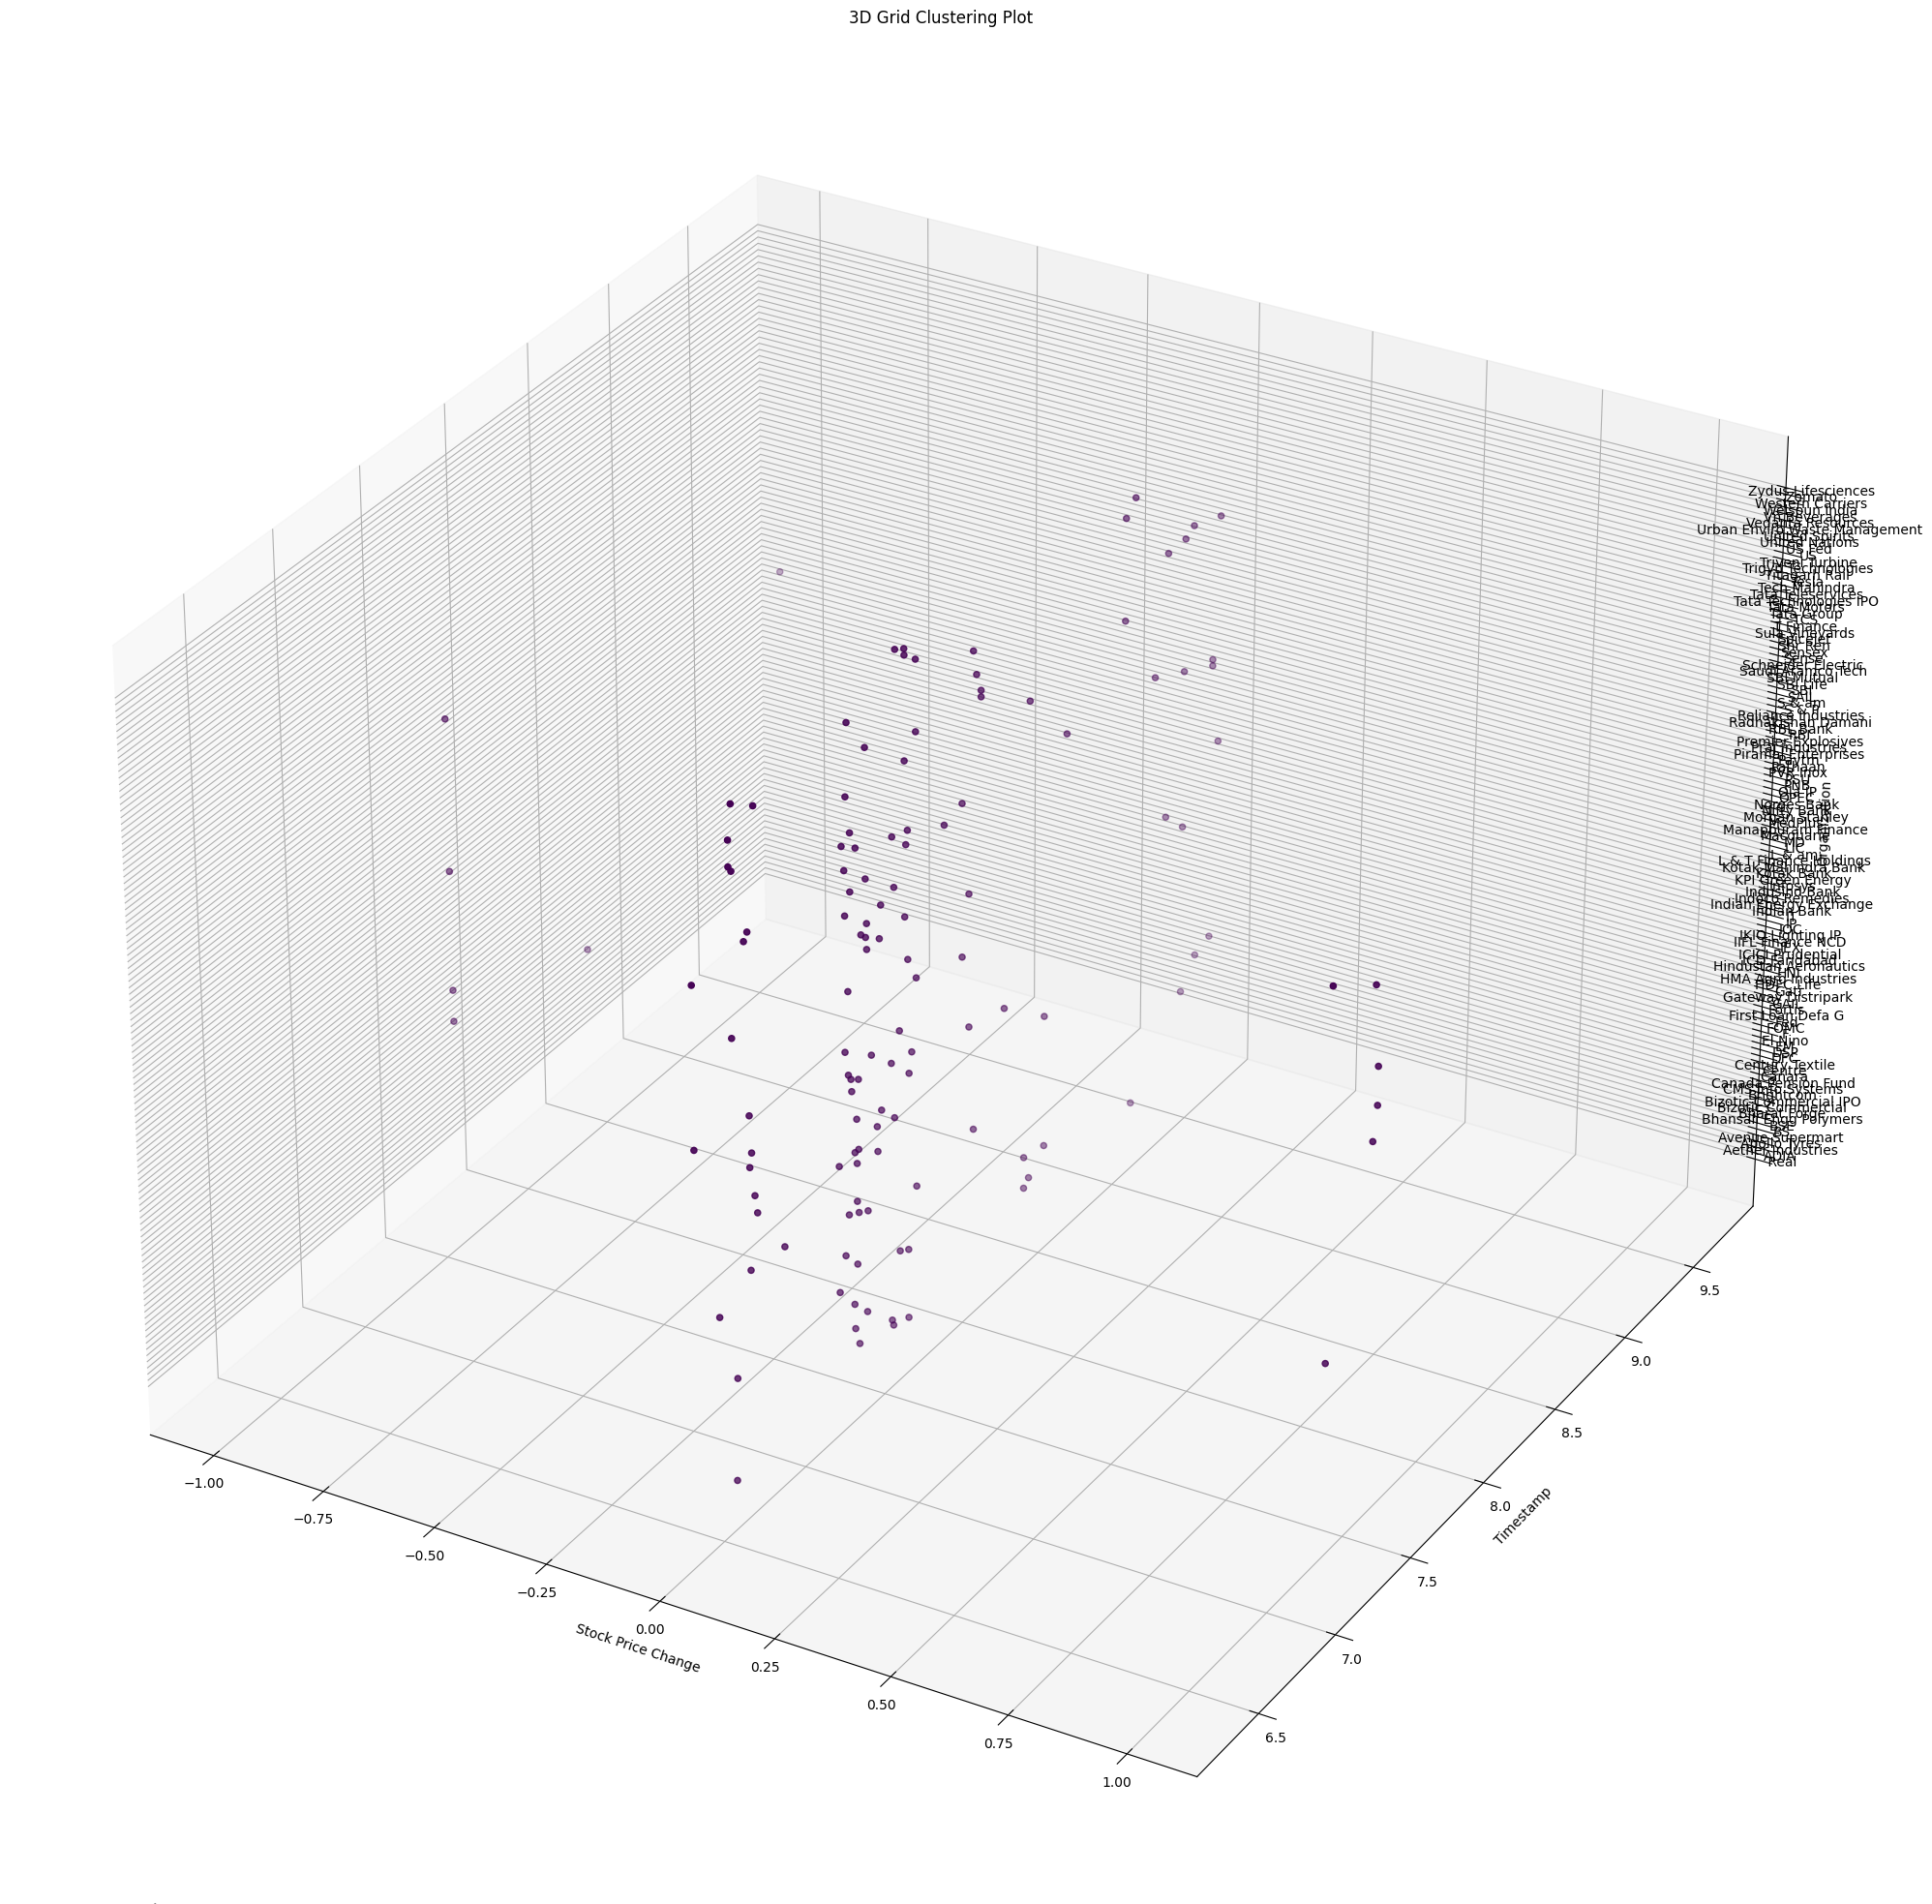

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from sklearn.preprocessing import LabelEncoder

# Group the data by stock price change, timestamp, and organization
grouped_data = news_df.groupby(['stock_price_change', 'published', 'org']).size().reset_index(name='count')

# Assign numerical values to stock price change classes
change_mapping = {'Decreased': -1, 'No Change': 0, 'Increased': 1}
grouped_data['change_value'] = grouped_data['stock_price_change'].map(change_mapping)

# Convert 'published' column to numerical format
grouped_data['published_num'] = mdates.date2num(grouped_data['published'])

# Encode the 'org' column numerically
label_encoder = LabelEncoder()
grouped_data['org_label'] = label_encoder.fit_transform(grouped_data['org'])

# Create a 3D grid clustering plot
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')

x = grouped_data['change_value']
y = grouped_data['published_num']
z = grouped_data['org_label']
c = grouped_data['count']

ax.scatter(x, y, z, c=c, cmap='viridis')
ax.set_xlabel('Stock Price Change')
ax.set_ylabel('Timestamp')
ax.set_zlabel('Organization')

# Set the tick labels for the 'org' column
ax.set_zticks(range(len(label_encoder.classes_)))
ax.set_zticklabels(label_encoder.classes_)

plt.title('3D Grid Clustering Plot')
plt.tight_layout()
plt.show()
